In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

%matplotlib inline

In [10]:
df = pd.read_csv('avocado.csv', index_col=0)

In [11]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [12]:
df.shape

(18249, 13)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 11
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.9+ MB


In [15]:
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [16]:
df_conventional = df.loc[df['type'] == 'conventional', 'AveragePrice']
df_conventional.head()

0    1.33
1    1.35
2    0.93
3    1.08
4    1.28
Name: AveragePrice, dtype: float64

In [17]:
df_organic = df.loc[df['type'] == 'organic', 'AveragePrice']
df_organic.head()

0    1.83
1    1.89
2    1.85
3    1.84
4    1.94
Name: AveragePrice, dtype: float64

In [18]:
df_conventional.shape

(9126,)

In [20]:
df_organic.shape

(9123,)

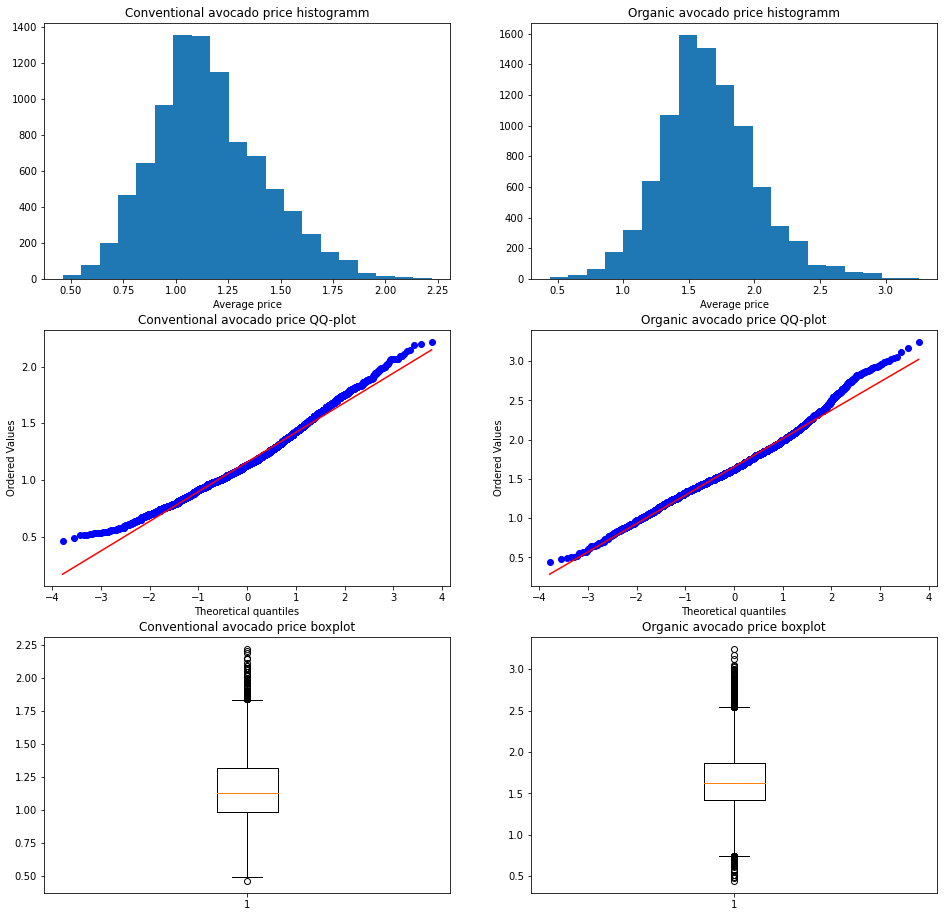

In [56]:
plt.figure(figsize=(16, 16))

plt.subplot(3, 2, 1)
plt.hist(df_conventional, bins=20)
plt.title('Conventional avocado price histogramm')
plt.xlabel('Average price')

plt.subplot(3, 2, 2)
plt.hist(df_organic, bins=20)
plt.title('Organic avocado price histogramm')
plt.xlabel('Average price')

plt.subplot(3, 2, 3)
st.probplot(df_conventional, plot=plt)
plt.title('Conventional avocado price QQ-plot')

plt.subplot(3, 2, 4)
st.probplot(df_organic, plot=plt)
plt.title('Organic avocado price QQ-plot')

plt.subplot(3, 2, 5)
plt.boxplot(df_conventional)
plt.title('Conventional avocado price boxplot')

plt.subplot(3, 2, 6)
plt.boxplot(df_organic)
plt.title('Organic avocado price boxplot')

plt.show()